In [2]:
from darknet import *

In [2]:
net = load_net(b"/home/sasuke/Downloads/darknet-master/cfg/yolov3.cfg", 
               b"/home/sasuke/Downloads/darknet-master/yolov3.weights", 0)
meta = load_meta(b"/home/sasuke/Downloads/darknet-master/cfg/coco.data")
r = detect(net, meta, b"/home/sasuke/Downloads/darknet-master/data/dog.jpg")
print (r)

[(b'dog', 0.999338686466217, (224.18377685546875, 378.4237060546875, 178.60214233398438, 328.1665954589844)), (b'bicycle', 0.9933530688285828, (344.39508056640625, 286.08282470703125, 489.40667724609375, 323.8568420410156)), (b'truck', 0.9153000116348267, (580.7305908203125, 125.11731719970703, 208.38641357421875, 87.00074768066406))]


In [3]:
r[1][2]

(344.39508056640625, 286.08282470703125, 489.40667724609375, 323.8568420410156)

In [5]:
import cv2

In [28]:
r[1]

(b'bicycle',
 0.9933530688285828,
 (344.39508056640625,
  286.08282470703125,
  489.40667724609375,
  323.8568420410156))

In [168]:
a , b , c , d   =r[2][2]
    
a = int(a)
b = int(b)
c = int(c)
d = int(d)

In [169]:
print(a , b , c, d)

580 125 208 87


In [170]:
img = cv2.imread('/home/sasuke/Downloads/darknet-master/data/dog.jpg')

In [171]:
#plt.imshow(img)

In [172]:
img.shape

(576, 768, 3)

In [173]:
#img = img[(b-a):a+b ,(d-c)//2:d]
img1 = img[b-d//2:b+d//2, a-c//2:a+c//2]
# img = img[a]

In [174]:
import matplotlib.pyplot as plt

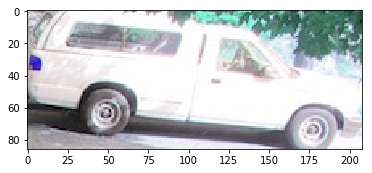

In [175]:
plt.imshow(img1)

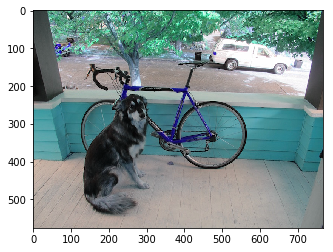

In [133]:
plt.imshow(img)

In [183]:
for i in range(len(r)):
    a , b , c , d   = r[i][2]
    a = int(a)
    b = int(b)
    c = int(c)
    d = int(d)
    img = cv2.imread('/home/sasuke/Downloads/darknet-master/test_data/2.png')
    img1 = img[b-d//2:b+d//2, a-c//2:a+c//2]
    cv2.imwrite('/home/sasuke/Downloads/darknet-master/python/cropped_images'+
                'image' + str(i+1) + '.jpg', img1)

In [176]:
len(r)

3

In [7]:
net = load_net(b"/home/sasuke/Downloads/darknet-master/yolov3-table.cfg", 
               b"/home/sasuke/Downloads/darknet-master/yolov3-table_18000.weights", 0)
meta = load_meta(b"/home/sasuke/Downloads/darknet-master/data/table.data")
r = detect(net, meta, b"/home/sasuke/Downloads/darknet-master/test_data/2.png")

In [8]:
print(r)

[(b'column', 0.9994839429855347, (404.4366455078125, 104.604248046875, 59.568382263183594, 140.79757690429688)), (b'column', 0.9994585514068604, (349.54638671875, 105.44851684570312, 53.53036880493164, 143.82666015625)), (b'column', 0.9990919232368469, (122.13137817382812, 105.61841583251953, 68.0712661743164, 138.2946014404297)), (b'column', 0.9980839490890503, (252.92225646972656, 105.84851837158203, 66.780029296875, 135.5245819091797)), (b'column', 0.99769526720047, (186.16983032226562, 106.072021484375, 76.08537292480469, 133.65948486328125)), (b'column', 0.9955175518989563, (61.46189880371094, 107.07305145263672, 67.0538558959961, 140.31251525878906)), (b'column', 0.9927448630332947, (304.2466735839844, 105.17180633544922, 47.457576751708984, 136.61322021484375)), (b'column', 0.9806899428367615, (455.6641540527344, 102.1915054321289, 52.574493408203125, 139.56629943847656))]


In [9]:
import cv2
for i in range(len(r)):
    a , b , c , d   = r[i][2]
    a = int(a)
    b = int(b)
    c = int(c)
    d = int(d)
    img = cv2.imread('/home/sasuke/Downloads/darknet-master/test_data/2.png')
    img1 = img[b-d//2:b+d//2, a-c//2:a+c//2]
    cv2.imwrite('/home/sasuke/Downloads/darknet-master/python/cropped_images/'+
                'image_1' + str(i+1) + '.jpg', img1)

In [52]:
import cv2

img = cv2.imread('/home/sasuke/Downloads/darknet-master/python/cropped_images/image1.jpg')
h, w, c = img.shape
#print(h);print(w)
cv2.rectangle(img,(0, 0),((w-1), (h-1)),(0, 0, 0),1)
cv2.imwrite('/home/sasuke/Downloads/darknet-master/python/cropped_images/'+'imageer.jpg', img)

True

In [28]:
import cv2
import numpy as np

## (1) read
img = cv2.imread("/home/sasuke/Downloads/darknet-master/python/cropped_images/imageer300.v1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90

## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))

## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,0, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
#print(hist[200])
uppers = [y for y in range(W-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(W-1) if hist[y]>th and hist[y+1]<=th]
print((lowers));print((uppers))

lowers1 = []
uppers1 = []

# count = 0

for i in range(len(uppers)):
    if abs(uppers[i]-lowers[i])<11:
        pass
    
    #elif abs(uppers[i-1]-uppers[i]<10) or abs(lowers[i-1]-lowers[i]<10):
     #   pass
        
    else:
        lowers1.append(lowers[i])
        uppers1.append(uppers[i])
#     count += 1
    #print(i)
    
print('....')
print(uppers1);print(lowers1)

#uppers2 = [uppers[0]]
#lowers2 = [lowers[-1]]

rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
for y in uppers:
    a = cv2.line(threshed, (y,0), (y,H), (255,0,0), 1)

for y in lowers:
    a = cv2.line(threshed, (y,0), (y, H), (0,255,0), 1)
    

    


cv2.imwrite("result_imageer.jpg", a)

[]
[]
....
[]
[]


NameError: name 'a' is not defined

In [62]:
import cv2
import numpy as np

## (1) read
img = cv2.imread("/home/sasuke/Document-Scanner/output/6.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)

## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed)
ret = cv2.minAreaRect(pts)

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90

## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)
rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0]))

## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

cv2.imwrite("result_6.jpg", rotated)

True

In [14]:
import cv2
import numpy as np

In [15]:
img1 = cv2.imread('cropped_images/image6.jpg')

In [16]:
img2 = cv2.resize(img1, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)

In [17]:
cv2.imwrite('cropped_images/image6_resize.jpg', img2)

True

In [25]:
n = numpy.zeros((3,3))
s = numpy.zeros((3,3))
w = numpy.zeros((3,3))
e = numpy.zeros((3,3))

n[0][1] = np.ones((2, 2), np.uint8)
s[2][1] = 1
w[1][0] = 1
e[1][2] = 1

img_n = cv2.erode(img1, n, iterations=1)
img_s = cv2.erode(img1, s, iterations=1)
img_w = cv2.erode(img1, w, iterations=1)
img_e = cv2.erode(img1, e, iterations=1)

result = img_n + img_s + img_w + img_e + img

ValueError: setting an array element with a sequence.

In [19]:
kernel = np.ones((2, 2), np.uint8)
# opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# dilation = cv2.dilate(opening, kernel, iterations=1)
# kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(img1, kernel, iterations=1)
# gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#
img1 = erosion.copy()

In [20]:
cv2.imwrite('cropped_images/improved.jpg', img1)

True

In [26]:
img6=cv2.imread('image61000.jpg')

In [24]:
cv2.resize(img6, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
cv2.imwrite('jadu.jpg', img6)

True

In [27]:
import PIL
from PIL import Image

mywidth = 300

img = Image.open('cropped_images/image6.jpg')
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
img.save('resized.jpg')